<a href="https://colab.research.google.com/github/shriju/ANN/blob/main/credit_card_customer_churn_prediction_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("/content/Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [8]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [9]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [10]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [17]:
X= df.drop(columns = ['Exited'])
y= df['Exited']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [20]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2694,628,29,3,113146.98,2,0,1,124749.08,1,0,1
5140,626,29,4,105767.28,2,0,0,41104.82,0,0,0
2568,612,47,6,130024.87,1,1,1,45750.21,1,0,0
3671,646,52,6,111739.40,2,0,1,68367.18,1,0,0
7427,714,33,8,122017.19,1,0,0,162515.17,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,621,47,7,107363.29,1,1,1,66799.28,1,0,1
7813,684,63,3,81245.79,1,1,0,69643.31,1,0,0
905,672,45,9,0.00,1,1,1,92027.69,0,0,0
5192,663,39,8,0.00,2,1,1,101168.90,0,0,0


In [19]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [61]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [62]:
X_test_scaled

array([[-1.03768121,  0.77498705, -1.0482813 , ..., -0.58312392,
        -0.57273139,  0.91509065],
       [ 0.30708683, -0.46686456, -0.70174202, ..., -0.58312392,
        -0.57273139,  0.91509065],
       [-1.23422423,  0.29735181, -1.0482813 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       ...,
       [-0.86182692, -0.46686456,  1.72403288, ..., -0.58312392,
         1.74601919,  0.91509065],
       [-0.30323097, -0.84897275, -1.0482813 , ...,  1.71490137,
        -0.57273139, -1.09278791],
       [ 0.04847759,  1.25262228,  1.3774936 , ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [63]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense


In [64]:
model =Sequential()

In [65]:
model.add(Dense(11, activation= 'relu', input_dim=11))
model.add(Dense(11, activation= 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [66]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 11)                132       
                                                                 
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [67]:
model.compile(loss='binary_crossentropy', optimizer = 'Adam', metrics =['accuracy'])

In [68]:
history = model.fit(X_train_scaled, y_train, epochs =100, validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 2s 4ms/step - loss: 0.5506 - accuracy: 0.7728 - val_loss: 0.4855 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4686 - accuracy: 0.8000 - val_loss: 0.4531 - val_accuracy: 0.7994
Epoch 3/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4422 - accuracy: 0.8089 - val_loss: 0.4377 - val_accuracy: 0.7987
Epoch 4/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4290 - accuracy: 0.8166 - val_loss: 0.4282 - val_accuracy: 0.8069
Epoch 5/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8202 - val_loss: 0.4217 - val_accuracy: 0.8112
Epoch 6/100
200/200 [==============================] - 0s 2ms/step - loss: 0.4132 - accuracy: 0.8248 - val_loss: 0.4135 - val_accuracy: 0.8144
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4047 - accuracy: 0.8291 - val_loss: 0.4040 - val_accuracy: 0.8206

In [53]:
model.layers[0].get_weights()

[array([[-0.15986739,  0.23426579, -0.37311038,  0.05090459,  0.06939747,
          0.11819404,  0.36738655, -0.10246977, -0.5174553 ,  0.2522295 ,
         -0.04724212],
        [ 0.1306416 , -0.7110432 ,  0.7237591 , -0.7258837 ,  0.29489198,
         -0.35177198, -0.6756729 , -0.09312966, -0.3137906 , -0.06671035,
          0.8581977 ],
        [-0.1722909 ,  0.5048114 , -0.38231483, -0.01160148, -0.03455603,
          0.07526578,  0.39522684,  0.18454194,  0.26323852,  0.12140933,
          0.13789856],
        [-0.77444744, -0.45951217, -0.00988355,  0.11723182,  0.7283936 ,
         -0.753188  ,  0.49026024,  0.70135605, -0.26575848, -0.15311931,
          0.12901273],
        [-0.12345071,  0.33580577, -1.1772033 ,  0.03956017,  0.88309896,
          0.8211791 ,  0.23442373, -0.4730977 , -0.03000945, -1.2309064 ,
          0.04143608],
        [-0.48798266, -0.35111135, -0.01298772,  0.01493436, -0.0164105 ,
          0.1185623 ,  0.562192  , -0.32026207,  0.1129456 , -0.0049045

In [54]:
model.layers[1].get_weights()

[array([[ 0.37987357, -0.44391218,  0.27819338,  0.10174648, -0.14618926,
          0.27512848,  0.20680955, -0.574556  ,  0.21128233,  0.63478833,
          0.2424867 ],
        [-0.99371356, -0.46069688,  0.00975583,  0.09104134, -0.28615847,
          0.04435202,  0.385248  , -0.5840903 ,  0.01312554, -0.40243247,
          0.0624682 ],
        [-0.33693424, -0.43793   , -0.37696996,  0.53292954, -0.10459665,
         -0.15186116, -0.8839494 , -0.30989534, -0.05664834, -0.11640282,
         -0.13672164],
        [ 0.491189  , -0.00615307,  0.49674827, -0.35401216, -0.26297575,
          0.36038512, -0.82528985,  0.16567305,  0.6612877 , -1.1457319 ,
          0.471692  ],
        [-0.11023403, -0.3561776 , -0.39638215,  0.27500364, -0.5610947 ,
          0.26094514, -0.8344475 , -0.10825648, -0.40194306,  1.2510791 ,
         -0.33909938],
        [-0.0515231 ,  0.09666683,  0.47409153,  0.43736082,  0.3567517 ,
         -0.8084544 ,  0.45512167, -1.4502145 ,  0.20011102,  0.8548720

In [55]:
model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


array([[0.0388873 ],
       [0.06262915],
       [0.0183962 ],
       ...,
       [0.01280623],
       [0.01082384],
       [0.3289683 ]], dtype=float32)

In [56]:
y_log =model.predict(X_test_scaled)

63/63 [==============================] - 0s 1ms/step


In [57]:
# taking a threshold of 0.5 to convert predicted probabilities to either 0 or 1
np.where(y_log>0.5, 1, 0)


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [58]:
y_pred = np.where(y_log>0.5, 1, 0)

In [59]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.8595

In [69]:
import matplotlib.pyplot as plt


In [71]:
history.history

{'loss': [0.5505800843238831,
  0.46861961483955383,
  0.4421654939651489,
  0.4290243983268738,
  0.4210550785064697,
  0.41323187947273254,
  0.4046528935432434,
  0.3954057991504669,
  0.3861158490180969,
  0.37731701135635376,
  0.36790356040000916,
  0.36045268177986145,
  0.35458946228027344,
  0.35044634342193604,
  0.34710922837257385,
  0.3446178138256073,
  0.3429792523384094,
  0.3415520489215851,
  0.3400988280773163,
  0.3388317823410034,
  0.33835074305534363,
  0.3372344672679901,
  0.33640211820602417,
  0.33578887581825256,
  0.33561477065086365,
  0.33482620120048523,
  0.33381199836730957,
  0.33337458968162537,
  0.33299556374549866,
  0.3323085308074951,
  0.3315131366252899,
  0.3311989903450012,
  0.33064648509025574,
  0.3299778401851654,
  0.3299063742160797,
  0.3294764459133148,
  0.3285331726074219,
  0.3284743130207062,
  0.32824936509132385,
  0.32745856046676636,
  0.3271142244338989,
  0.32730811834335327,
  0.32706761360168457,
  0.3264836072921753,
  0

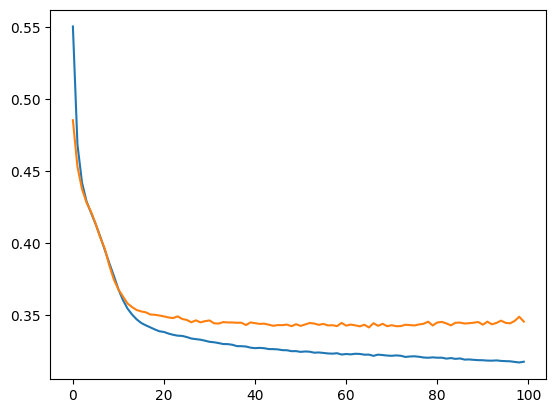

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

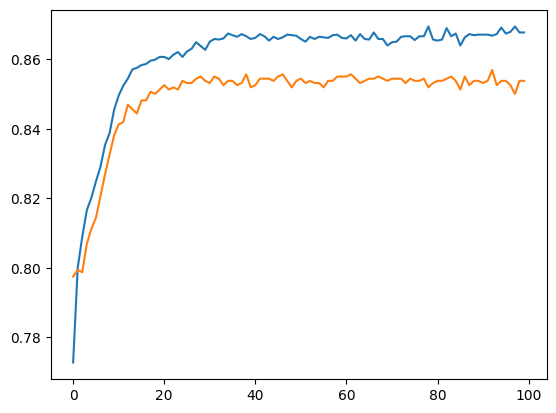

In [74]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])